# Weekly Project 2!

## Introduction to Road Traffic Accidents (RTA) Dataset

### Dataset Overview
The RTA Dataset provides a detailed snapshot of road traffic accidents, capturing a range of data from accident conditions to casualty details. This dataset is essential for analyzing patterns and causes of accidents to improve road safety.

### Data Characteristics
- **Entries**: The dataset contains 12,316 entries.
- **Features**: There are 32 features in the dataset, which include:
  - `Time`: Time when the accident occurred.
  - `Day_of_week`: Day of the week.
  - `Age_band_of_driver`: Age group of the driver involved.
  - `Sex_of_driver`: Gender of the driver.
  - `Educational_level`: Educational level of the driver.
  - `Type_of_vehicle`: Type of vehicle involved in the accident.
  - `Cause_of_accident`: Reported cause of the accident.
  - `Accident_severity`: Severity of the accident.
- **Target Column**: `Accident_severity` is used as the target column for modeling. This feature classifies the severity of each accident.

### Objective
Students will use this dataset to apply various data visualization, modeling, and evaluation techniques learned in class. The primary goal is to build models that can accurately predict the severity of accidents and to identify the key factors that contribute to severe accidents.

## Import Libraries
Import all the necessary libraries here. Include libraries for handling data (like pandas), visualization (like matplotlib and seaborn), and modeling (like scikit-learn).

In [287]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score , confusion_matrix , f1_score , precision_score , recall_score
from sklearn.model_selection import cross_val_score ,KFold

np.random.seed(42)

## Load Data
Load the dataset from the provided CSV file into a DataFrame.

In [288]:
df = pd.read_csv('RTA_Dataset.csv')
df.head()


,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [289]:
df.tail()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury
12315,13:55:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Other,Owner,2-5yrs,...,Stopping,Pedestrian,Female,5,3,Driver,Normal,Crossing from nearside - masked by parked or s...,Changing lane to the right,Slight Injury


In [290]:
df.sample(5)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
4281,14:27:00,Friday,Over 51,Male,Junior high school,Employee,Above 10yr,NaN,Owner,2-5yrs,...,U-Turn,na,na,na,na,Driver,Normal,Not a Pedestrian,Changing lane to the left,Slight Injury
4010,16:00:00,Sunday,Under 18,Male,Junior high school,Employee,Below 1yr,Automobile,Owner,NaN,...,Other,na,na,na,na,NaN,NaN,Not a Pedestrian,Driving carelessly,Slight Injury
1022,16:56:00,Wednesday,18-30,Male,NaN,NaN,NaN,NaN,NaN,NaN,...,Getting off,Driver or rider,Male,18-30,3,Driver,Normal,Not a Pedestrian,No distancing,Serious Injury
8775,15:48:00,Tuesday,31-50,Male,Junior high school,Employee,Below 1yr,Public (12 seats),Owner,NaN,...,Going straight,Driver or rider,Male,18-30,3,Self-employed,Normal,Not a Pedestrian,Moving Backward,Slight Injury
10000,12:48:00,Friday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,Unknown,...,Going straight,Passenger,Female,31-50,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury


In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

## Data Preprocessing
Data preprocessing is essential for transforming raw data into a format suitable for further analysis and modeling. Follow these steps to ensure your data is ready for predictive modeling or advanced analytics:
- **Handling Missing Values**: Replace missing values with appropriate statistics (mean, median, mode) or use more complex imputation techniques.
- **Normalization/Scaling**: Scale data to a small, specified range like 0 to 1, or transform it to have a mean of zero and a standard deviation of one.
- **Label Encoding**: Convert categorical text data into model-understandable numbers where the labels are ordered.
- **One-Hot Encoding**: Use for nominal categorical data where no ordinal relationship exists to transform the data into a binary column for each category. (Be careful not to increase the dimensionality significantly)
- **Detection and Treatment of Outliers**: Use statistical tests, box plots, or scatter plots to identify outliers and then cap, trim, or use robust methods to reduce the effect of outliers, depending on the context.
- **Feature Engineering**: Enhance your dataset by creating new features and transforming existing ones. This might involve combining data from different columns, applying transformations, or reducing dimensionality with techniques like PCA to improve model performance.

Consider these steps as a foundation, and feel free to introduce additional preprocessing techniques as needed to address specific characteristics of your dataset.

In [292]:
df = df[['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver', 'Educational_level','Driving_experience', 'Type_of_vehicle', 'Area_accident_occured', 'Road_surface_type', 'Road_surface_conditions', 'Light_conditions', 'Weather_conditions', 'Number_of_vehicles_involved', 'Number_of_casualties','Casualty_severity', 'Cause_of_accident', 'Accident_severity']]

In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Driving_experience           11487 non-null  object
 6   Type_of_vehicle              11366 non-null  object
 7   Area_accident_occured        12077 non-null  object
 8   Road_surface_type            12144 non-null  object
 9   Road_surface_conditions      12316 non-null  object
 10  Light_conditions             12316 non-null  object
 11  Weather_conditions           12316 non-null  object
 12  Number_of_vehicles_involved  12316 non-null  int64 
 13  Number_of_casualties         12

In [294]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,741
Driving_experience,829
Type_of_vehicle,950
Area_accident_occured,239
Road_surface_type,172
Road_surface_conditions,0


In [295]:
df.duplicated().sum()

0

In [296]:
df.dropna(inplace=True)

In [297]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,0
Driving_experience,0
Type_of_vehicle,0
Area_accident_occured,0
Road_surface_type,0
Road_surface_conditions,0


In [298]:
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Driving_experience,Type_of_vehicle,Area_accident_occured,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Number_of_vehicles_involved,Number_of_casualties,Casualty_severity,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,1-2yr,Automobile,Residential areas,Asphalt roads,Dry,Daylight,Normal,2,2,na,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Above 10yr,Public (> 45 seats),Office areas,Asphalt roads,Dry,Daylight,Normal,2,2,na,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,1-2yr,Lorry (41?100Q),Recreational areas,Asphalt roads,Dry,Daylight,Normal,2,2,3,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,5-10yr,Public (> 45 seats),Office areas,Earth roads,Dry,Darkness - lights lit,Normal,2,2,3,Changing lane to the right,Slight Injury
7,17:20:00,Friday,18-30,Male,Junior high school,2-5yr,Automobile,Residential areas,Asphalt roads,Dry,Daylight,Normal,2,1,na,No priority to vehicle,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12309,9:05:00,Friday,31-50,Female,Elementary school,5-10yr,Pick up upto 10Q,School areas,Asphalt roads,Wet or damp,Darkness - lights lit,Normal,2,2,3,Driving to the left,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,5-10yr,Automobile,Outside rural areas,Asphalt roads,Dry,Daylight,Normal,2,1,na,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,5-10yr,Bajaj,Outside rural areas,Asphalt roads,Dry,Daylight,Normal,1,1,3,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Above 10yr,Lorry (41?100Q),Office areas,Asphalt roads,Dry,Darkness - lights lit,Normal,2,1,na,Driving under the influence of drugs,Slight Injury


In [299]:
df['Driving_experience'] = df['Driving_experience'].replace('No Licence', '-1')
df['Driving_experience'] = df['Driving_experience'].replace('Below 1yr', '0')
df['Driving_experience'] = df['Driving_experience'].replace('Above 10yr', '10')
df['Driving_experience'] = df['Driving_experience'].replace('1-2yr', '1')
df['Driving_experience'] = df['Driving_experience'].replace('2-5yr', '3')
df['Driving_experience'] = df['Driving_experience'].replace('5-10yr', '7')
df['Driving_experience'] = df['Driving_experience'].replace('unknown', df['Driving_experience'].mode()[0])
df['Driving_experience'] = df['Driving_experience'].astype(int)
df['Driving_experience'].value_counts()

,count
Driving_experience,
7,2931
3,2324
10,2029
1,1565
0,1183
-1,110


In [300]:
for col in df.columns:
  print(df[col].value_counts())

Time
15:30:00    98
17:10:00    97
18:30:00    86
18:00:00    85
17:00:00    83
            ..
7:56:00      1
16:34:00     1
12:26:00     1
20:52:00     1
0:19:00      1
Name: count, Length: 1051, dtype: int64
Day_of_week
Friday       1690
Thursday     1506
Wednesday    1504
Tuesday      1467
Saturday     1398
Monday       1379
Sunday       1198
Name: count, dtype: int64
Age_band_of_driver
18-30       3483
31-50       3378
Over 51     1304
Unknown     1282
Under 18     695
Name: count, dtype: int64
Sex_of_driver
Male       9429
Female      576
Unknown     137
Name: count, dtype: int64
Educational_level
Junior high school    6688
Elementary school     1878
High school            974
Above high school      322
Writing & reading      163
Unknown                 78
Illiterate              39
Name: count, dtype: int64
Driving_experience
 7     2931
 3     2324
 10    2029
 1     1565
 0     1183
-1      110
Name: count, dtype: int64
Type_of_vehicle
Automobile              2843
Lorry (41?100

In [301]:
for col in df.columns:
    df[col] = df[col].replace('unknown', df[col].mode()[0])
    df[col] = df[col].replace('Unknown', df[col].mode()[0])
    df[col] = df[col].replace('na', df[col].mode()[0])

In [302]:
for col in df.columns:
  print(df[col].value_counts())

Time
15:30:00    98
17:10:00    97
18:30:00    86
18:00:00    85
17:00:00    83
            ..
7:56:00      1
16:34:00     1
12:26:00     1
20:52:00     1
0:19:00      1
Name: count, Length: 1051, dtype: int64
Day_of_week
Friday       1690
Thursday     1506
Wednesday    1504
Tuesday      1467
Saturday     1398
Monday       1379
Sunday       1198
Name: count, dtype: int64
Age_band_of_driver
18-30       4765
31-50       3378
Over 51     1304
Under 18     695
Name: count, dtype: int64
Sex_of_driver
Male      9566
Female     576
Name: count, dtype: int64
Educational_level
Junior high school    6766
Elementary school     1878
High school            974
Above high school      322
Writing & reading      163
Illiterate              39
Name: count, dtype: int64
Driving_experience
 7     2931
 3     2324
 10    2029
 1     1565
 0     1183
-1      110
Name: count, dtype: int64
Type_of_vehicle
Automobile              2843
Lorry (41?100Q)         1964
Other                   1081
Pick up upto 10Q 

In [303]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10142 entries, 0 to 12315
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         10142 non-null  object
 1   Day_of_week                  10142 non-null  object
 2   Age_band_of_driver           10142 non-null  object
 3   Sex_of_driver                10142 non-null  object
 4   Educational_level            10142 non-null  object
 5   Driving_experience           10142 non-null  int64 
 6   Type_of_vehicle              10142 non-null  object
 7   Area_accident_occured        10142 non-null  object
 8   Road_surface_type            10142 non-null  object
 9   Road_surface_conditions      10142 non-null  object
 10  Light_conditions             10142 non-null  object
 11  Weather_conditions           10142 non-null  object
 12  Number_of_vehicles_involved  10142 non-null  int64 
 13  Number_of_casualties         10142 n

In [304]:
df['Time'] = pd.to_datetime(df['Time'], errors='coerce').dt.time

<ipython-input-304-6eaf9c51d1da>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'], errors='coerce').dt.time


In [305]:
df['Casualty_severity'] = df['Casualty_severity'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10142 entries, 0 to 12315
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         10142 non-null  object
 1   Day_of_week                  10142 non-null  object
 2   Age_band_of_driver           10142 non-null  object
 3   Sex_of_driver                10142 non-null  object
 4   Educational_level            10142 non-null  object
 5   Driving_experience           10142 non-null  int64 
 6   Type_of_vehicle              10142 non-null  object
 7   Area_accident_occured        10142 non-null  object
 8   Road_surface_type            10142 non-null  object
 9   Road_surface_conditions      10142 non-null  object
 10  Light_conditions             10142 non-null  object
 11  Weather_conditions           10142 non-null  object
 12  Number_of_vehicles_involved  10142 non-null  int64 
 13  Number_of_casualties         10142 n

In [306]:
df.sample(5)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Driving_experience,Type_of_vehicle,Area_accident_occured,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Number_of_vehicles_involved,Number_of_casualties,Casualty_severity,Cause_of_accident,Accident_severity
5476,13:30:00,Saturday,18-30,Male,Elementary school,10,Long lorry,Church areas,Asphalt roads,Dry,Daylight,Normal,2,2,3,No distancing,Slight Injury
867,14:29:00,Saturday,31-50,Male,Above high school,0,Automobile,Other,Asphalt roads,Dry,Daylight,Normal,2,1,3,Moving Backward,Slight Injury
8994,16:12:00,Wednesday,Over 51,Male,Junior high school,10,Pick up upto 10Q,Other,Asphalt roads,Dry,Daylight,Other,2,1,3,No priority to vehicle,Slight Injury
4850,21:15:00,Sunday,18-30,Female,Junior high school,3,Automobile,Other,Asphalt roads,Dry,Darkness - lights lit,Normal,2,1,3,No distancing,Slight Injury
6481,15:15:00,Friday,Under 18,Male,High school,7,Automobile,Office areas,Asphalt roads,Dry,Daylight,Normal,2,1,3,Changing lane to the left,Serious Injury


In [307]:
ohe = OneHotEncoder(sparse=False,)
#Day_of_week 	Age_band_of_driver 	Sex_of_driver 	Educational_level 	Driving_experience 	Type_of_vehicle 	Area_accident_occured 	Road_surface_type 	Road_surface_conditions 	Light_conditions 	Weather_conditions 	Number_of_vehicles_involved 	Number_of_casualties 	Casualty_severity 	Cause_of_accident 	Accident_severity
catData = ['Age_band_of_driver' , 'Area_accident_occured' ,'Day_of_week', 'Sex_of_driver', 'Educational_level' , 'Type_of_vehicle' ,'Road_surface_type' , 'Road_surface_conditions' , 'Light_conditions' , 'Weather_conditions' , 'Cause_of_accident']
testdf = ohe.fit_transform(df[catData])
testdf = pd.DataFrame(testdf, columns=ohe.get_feature_names_out())
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10142 entries, 0 to 10141
Data columns (total 89 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Age_band_of_driver_18-30                                10142 non-null  float64
 1   Age_band_of_driver_31-50                                10142 non-null  float64
 2   Age_band_of_driver_Over 51                              10142 non-null  float64
 3   Age_band_of_driver_Under 18                             10142 non-null  float64
 4   Area_accident_occured_  Market areas                    10142 non-null  float64
 5   Area_accident_occured_  Recreational areas              10142 non-null  float64
 6   Area_accident_occured_ Church areas                     10142 non-null  float64
 7   Area_accident_occured_ Hospital areas                   10142 non-null  float64
 8   Area_accident_occured_ Industrial ar

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [308]:
tempdf = df.drop(catData, axis=1)
tempdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10142 entries, 0 to 12315
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         10142 non-null  object
 1   Driving_experience           10142 non-null  int64 
 2   Number_of_vehicles_involved  10142 non-null  int64 
 3   Number_of_casualties         10142 non-null  int64 
 4   Casualty_severity            10142 non-null  int64 
 5   Accident_severity            10142 non-null  object
dtypes: int64(4), object(2)
memory usage: 812.7+ KB


In [309]:
tempdf = pd.concat([df, testdf], axis=1)
tempdf.shape

(11919, 106)

In [310]:
tempdf.isna().sum()

,0
Time,1777
Day_of_week,1777
Age_band_of_driver,1777
Sex_of_driver,1777
Educational_level,1777
Driving_experience,1777
Type_of_vehicle,1777
Area_accident_occured,1777
Road_surface_type,1777
Road_surface_conditions,1777


In [311]:
tempdf.dropna(inplace=True)
tempdf.shape

(8365, 106)

In [312]:
for col in tempdf.columns:
  if tempdf[col].dtype == 'object':
    if col != 'Accident_severity':
      tempdf = tempdf.drop(col, axis=1)
tempdf

,Driving_experience,Number_of_vehicles_involved,Number_of_casualties,Casualty_severity,Accident_severity,Age_band_of_driver_18-30,Age_band_of_driver_31-50,Age_band_of_driver_Over 51,Age_band_of_driver_Under 18,Area_accident_occured_ Market areas,...,Cause_of_accident_Moving Backward,Cause_of_accident_No distancing,Cause_of_accident_No priority to pedestrian,Cause_of_accident_No priority to vehicle,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover
0,1.0,2.0,2.0,3.0,Slight Injury,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10.0,2.0,2.0,3.0,Slight Injury,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,2.0,2.0,3.0,Serious Injury,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7.0,2.0,2.0,3.0,Slight Injury,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,3.0,2.0,1.0,3.0,Slight Injury,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10137,7.0,2.0,1.0,3.0,Slight Injury,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10138,7.0,1.0,1.0,3.0,Slight Injury,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10139,7.0,1.0,1.0,3.0,Serious Injury,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10140,7.0,2.0,3.0,3.0,Slight Injury,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [313]:
tempdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8365 entries, 0 to 10141
Data columns (total 94 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Driving_experience                                      8365 non-null   float64
 1   Number_of_vehicles_involved                             8365 non-null   float64
 2   Number_of_casualties                                    8365 non-null   float64
 3   Casualty_severity                                       8365 non-null   float64
 4   Accident_severity                                       8365 non-null   object 
 5   Age_band_of_driver_18-30                                8365 non-null   float64
 6   Age_band_of_driver_31-50                                8365 non-null   float64
 7   Age_band_of_driver_Over 51                              8365 non-null   float64
 8   Age_band_of_driver_Under 18               

### i removed the outliers in the visualization

## Data Visualization
Create various plots to visualize the relationships in the data. Consider using the following to show different aspects of the data:

* Heatmap of Correlation Matrix.
* Line plots.
* Scatter plots.
* Histograms.
* Boxplots.

Use more if needed!

* Heatmap of Correlation Matrix.

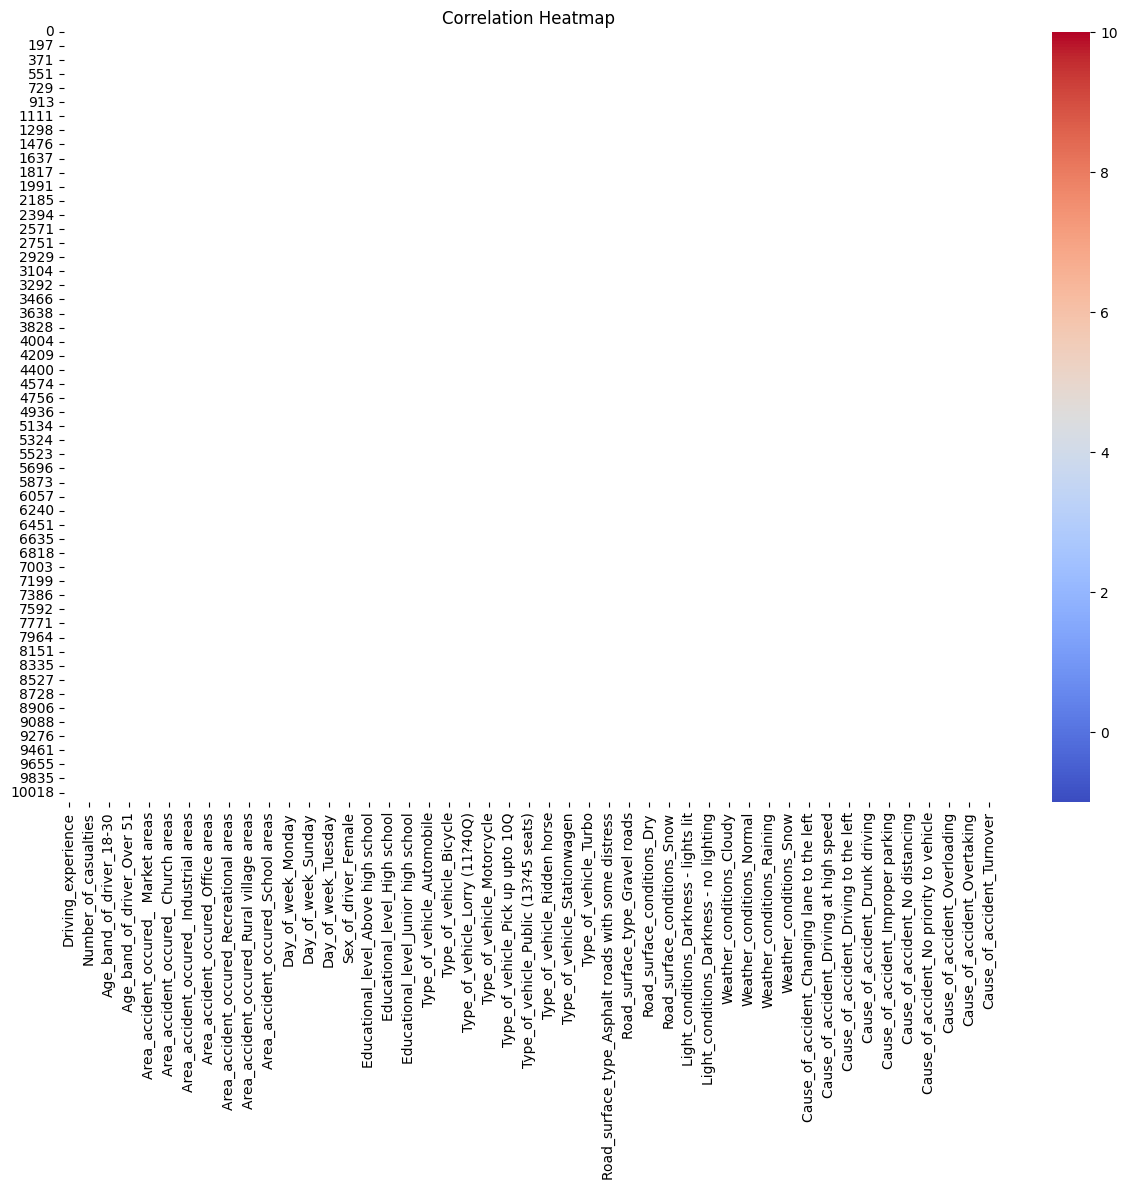

In [320]:
corrdf = tempdf.drop(['Accident_severity'], axis=1)
corrdf.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corrdf, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## there is to many feature


    Time: Time when the accident occurred.
    Day_of_week: Day of the week.
    Age_band_of_driver: Age group of the driver involved.
    Sex_of_driver: Gender of the driver.
    Educational_level: Educational level of the driver.
    Type_of_vehicle: Type of vehicle involved in the accident.
    Cause_of_accident: Reported cause of the accident.
    Accident_severity: Severity of the accident.



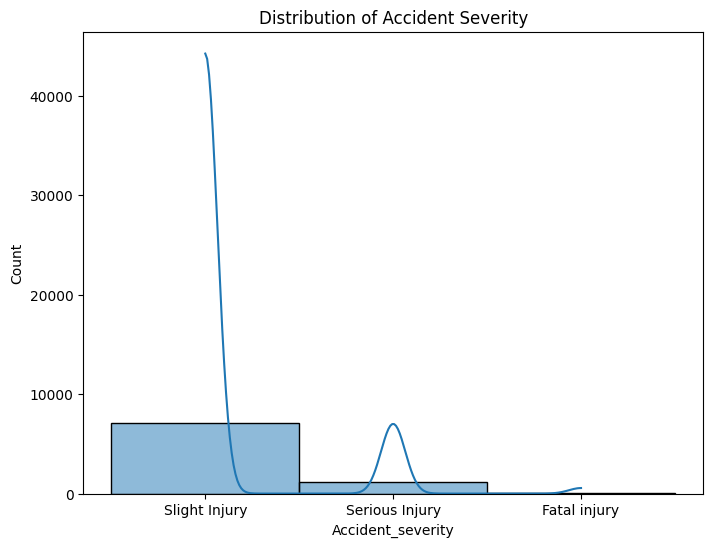

In [314]:
plt.figure(figsize=(8, 6))
sns.histplot(data=tempdf, x='Accident_severity', kde=True)
plt.title('Distribution of Accident Severity')
plt.show()

* Histograms.

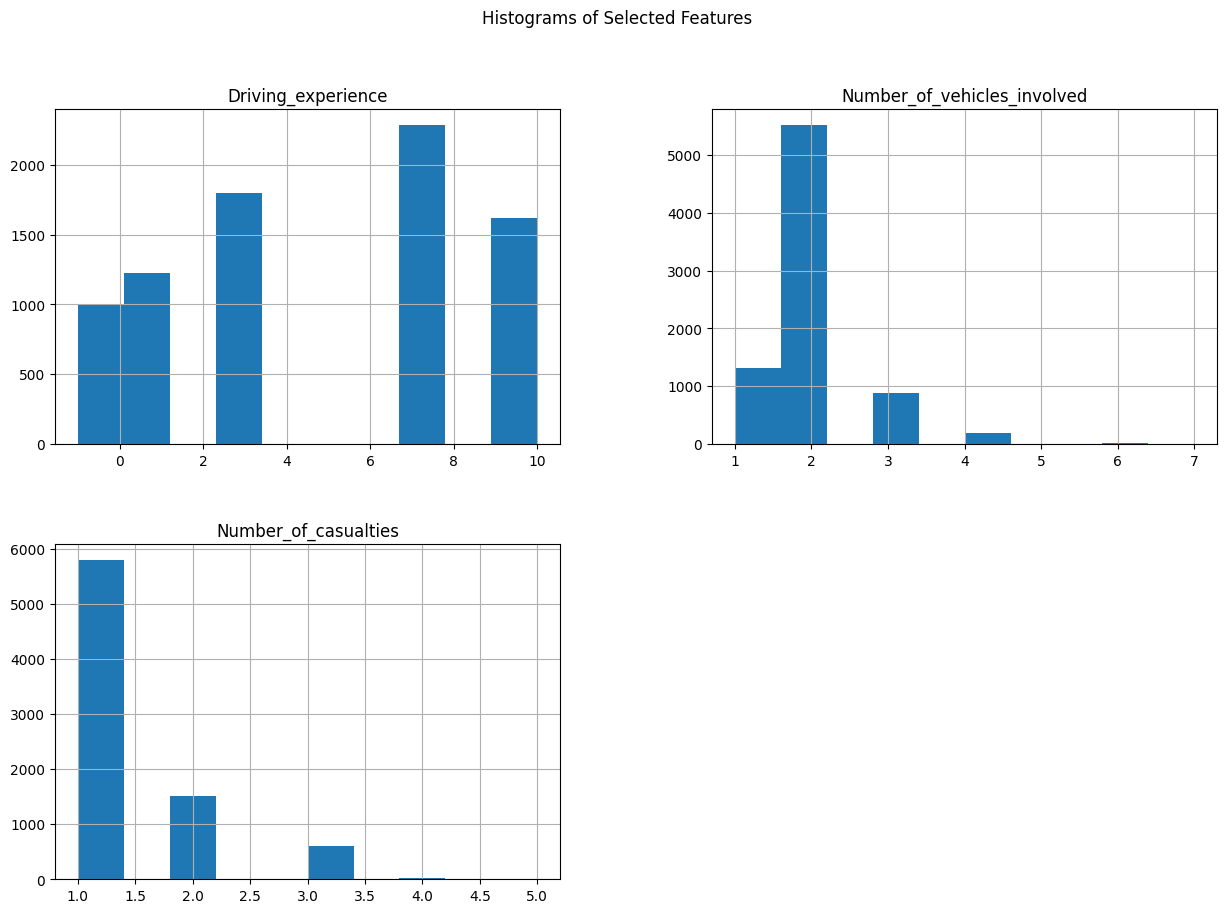

In [338]:
features = ['Driving_experience', 'Number_of_vehicles_involved', 'Number_of_casualties']

tempdf[features].hist(bins=10, figsize=(15, 10))
plt.suptitle('Histograms of Selected Features')
plt.show()

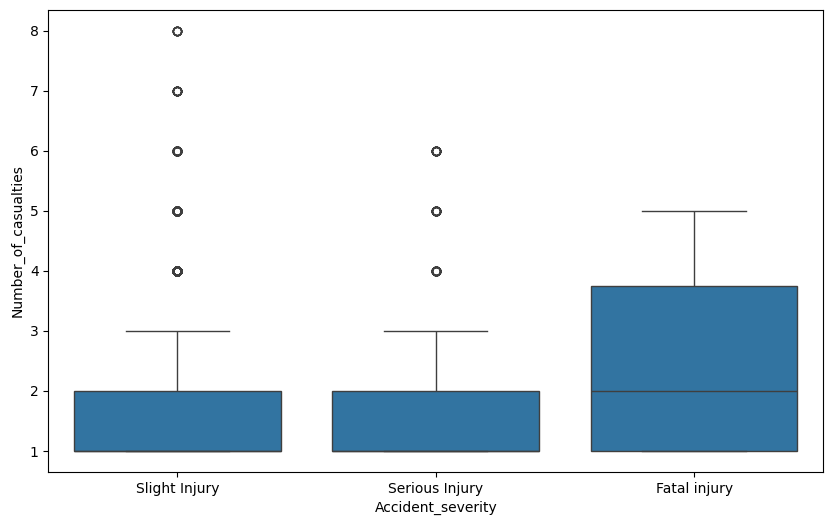

In [315]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Accident_severity', y='Number_of_casualties', data=tempdf)
plt.show()

there is outliers we should deal with them

In [316]:
notOutliesr = tempdf[tempdf['Number_of_casualties'] > 3]
notOutliesr

Outliesr = notOutliesr[notOutliesr['Accident_severity'] != 'Fatal injury']
Outliesr

print(Outliesr.shape)
print(notOutliesr.shape)

tempdf = tempdf.drop(Outliesr.index)
tempdf.shape

(441, 94)
(464, 94)


(7924, 94)

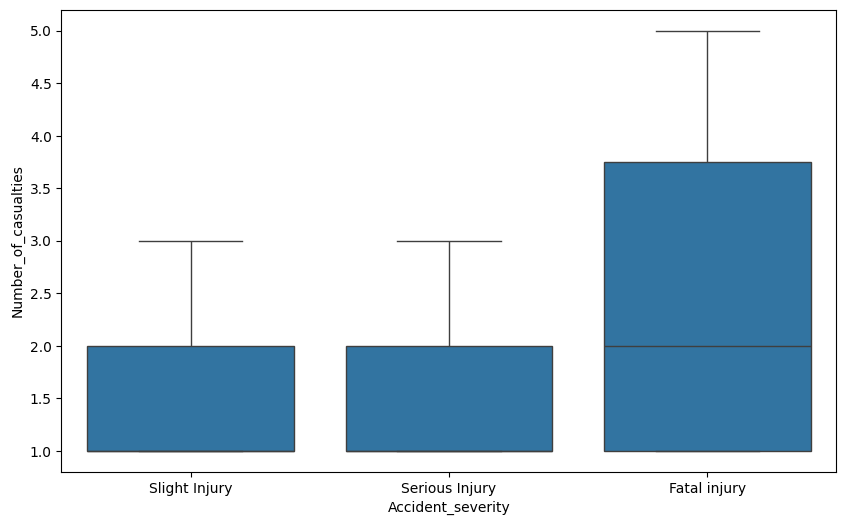

In [317]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Accident_severity', y='Number_of_casualties', data=tempdf)
plt.show()

ما انتبهت انه هتا يبيني اسوي الفجولايزيشن علشان ابني المودلز حسبته للتنظيف بس


## Feature Selection
- Choose features that you believe will most influence the outcome based on your analysis and the insights from your visualizations. Focus on those that appear most impactful to include in your modeling.

## Train-Test Split
* Divide the dataset into training and testing sets to evaluate the performance of your models.

In [336]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split



from sklearn.metrics import classification_report, accuracy_score
#Accident_severity_Fatal injury 	Accident_severity_Serious Injury 	Accident_severity_Slight Injury
X = tempdf.drop(['Accident_severity'], axis=1)
y = (tempdf['Accident_severity'] == 'Slight Injury').astype(int) ##

print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y.value_counts())
print(y_test.value_counts())


(7924, 93)
(7924,)
(6339, 93)
(1585, 93)
(6339,)
(1585,)
Accident_severity
1    6776
0    1148
Name: count, dtype: int64
Accident_severity
1    1355
0     230
Name: count, dtype: int64


## Modeling

Once the data is split into training and testing sets, the next step is to build models to make predictions. Here, we will explore several machine learning algorithms, each with its unique characteristics and suitability for different types of data and problems. You will implement the following models:

### 1. Logistic Regression

### 2. Decision Tree Classifier

### 3. Support Vector Machine (SVM)

### 4. K-Neighbors Classifier

### Implementing the Models
- For each model, use the training data you have prepared to train the model.

#### Logistic Regression

In [329]:
LogM = LogisticRegression()
LogM.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### Decision Tree Classifier

In [330]:
DTM = DecisionTreeClassifier()
DTM.fit(X_train, y_train)

DecisionTreeClassifier()

#### Support Vector Machine (SVM)

In [331]:
SVMM = SVC()
SVMM.fit(X_train, y_train)

SVC()

#### K-Neighbors Classifier

In [332]:
KNNM = KNeighborsClassifier()
KNNM.fit(X_train, y_train)

KNeighborsClassifier()

## Model Evaluation

After training your models, it's crucial to evaluate their performance to understand their effectiveness and limitations. This section outlines various techniques and metrics to assess the performance of each model you have implemented.

### Evaluation Techniques
1. **Confusion Matrix**

2. **Accuracy**

3. **Precision and Recall**

4. **F1 Score**

5. **ROC Curve and AUC**

### Implementing Evaluation
- Calculate the metrics listed above using your test data.

In [333]:
kf10 = KFold(n_splits=10, shuffle=True)
modele = (LogM , DTM , SVMM , KNNM)
for model in modele:
  cross_val_results = cross_val_score(model, X_train, y_train, cv=kf10)
  print('============================================================')
  print(model)
  print(f'theis is the array of the acc of this model {LR10_cross_val_results}')
  print(f'Mean Accuracy for {model} with 10 folds : {cross_val_results.mean()}')



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LogisticRegression()
theis is the array of the acc of this model [0.85173502 0.82018927 0.82334385 0.8533123  0.85015773 0.85015773
 0.83911672 0.85646688 0.85804416 0.83728278]
Mean Accuracy for LogisticRegression() with 10 folds : 0.85502364684717
DecisionTreeClassifier()
theis is the array of the acc of this model [0.85173502 0.82018927 0.82334385 0.8533123  0.85015773 0.85015773
 0.83911672 0.85646688 0.85804416 0.83728278]
Mean Accuracy for DecisionTreeClassifier() with 10 folds : 0.7490152545836012
SVC()
theis is the array of the acc of this model [0.85173502 0.82018927 0.82334385 0.8533123  0.85015773 0.85015773
 0.83911672 0.85646688 0.85804416 0.83728278]
Mean Accuracy for SVC() with 10 folds : 0.8551813755537948
KNeighborsClassifier()
theis is the array of the acc of this model [0.85173502 0.82018927 0.82334385 0.8533123  0.85015773 0.85015773
 0.83911672 0.85646688 0.85804416 0.83728278]
Mean Accuracy for KNeighborsClassifier() with 10 folds : 0.8422463757282183


In [335]:
for model in modele:
  y_pred = model.predict(X_test)
  print('============================================================')
  print(model)
  print(f'the CM {confusion_matrix(y_test, y_pred)}')
  print(f'the acc {accuracy_score(y_test, y_pred)}')
  print(f'the recall {recall_score(y_test, y_pred)}')
  print(f'the fi {f1_score(y_test, y_pred)}')


LogisticRegression()
the CM [[   0  230]
 [   0 1355]]
the acc 0.8548895899053628
the recall 1.0
the fi 0.9217687074829932
DecisionTreeClassifier()
the CM [[  46  184]
 [ 203 1152]]
the acc 0.7558359621451104
the recall 0.8501845018450185
the fi 0.8561872909698995
SVC()
the CM [[   0  230]
 [   0 1355]]
the acc 0.8548895899053628
the recall 1.0
the fi 0.9217687074829932
KNeighborsClassifier()
the CM [[  11  219]
 [  26 1329]]
the acc 0.8454258675078864
the recall 0.9808118081180812
the fi 0.9156045470203238


## Project Questions:

### Comparative Analysis

- **Compare Metrics**: Examine the performance metrics (such as accuracy, precision, and recall) of each model. Document your observations on which model performs best for your dataset and the problem you're addressing.
- **Evaluate Trade-offs**: Discuss the trade-offs you encountered when choosing between models. Consider factors like computational efficiency, ease of implementation, and model interpretability.
- **Justify Your Choice**: After comparing and evaluating, explain why you believe one model is the best choice. Provide a clear rationale based on the performance metrics and trade-offs discussed.
- **Feature Importance**: Identify and discuss the most important features for the best-performing model. How do these features impact the predictions? Use the visualizations you have created to justify your answer if necessary.
- **Model Limitations**: Discuss any limitations you encountered with the models you used. Are there any aspects of the data or the problem that these models do not handle well?
- **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. This could include trying different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:


i dnot know what is the isuss with the LR and SVM the dont predict any negative value i think because the data baesd and need a lot of adjustment

the model with highst acc is the ones who never predict vigative but this dose not make them the best ones in my openen KNN is better then them regardless its hight sinsitevte for outliers but in my case the data is with out outliers